In [513]:
# 📊 Evaluación de la Red Neuronal Convolucional (CNN)

# 🔧 Cargar librerías
import os
import sys
sys.path.append("../src")

import yaml
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

import evaluate as ev
import utils

In [514]:
# 📁 Cargar configuración
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [515]:
# 📂 Cargar generador de validación
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_path = os.path.join(config["paths"]["prepared_data"], "val_reduced")
img_height = config["image"]["height"]
img_width = config["image"]["width"]
batch_size = config["training"]["batch_size"]

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 136 images belonging to 7 classes.


In [516]:
# 💾 Cargar modelo entrenado
model_path = config["paths"]["model"]
model = load_model(model_path)

In [517]:
# 🔮 Predecir probabilidades
y_scores = model.predict(val_generator)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

5/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

c:\Users\homel\OneDrive - Universidad San Sebastian\Escritorio\DeepNeuralNetworkUSS\Projects\Supermarket\venv_cnn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [518]:
# 🔢 Convertir predicciones a clases
y_pred = np.argmax(y_scores, axis=1)

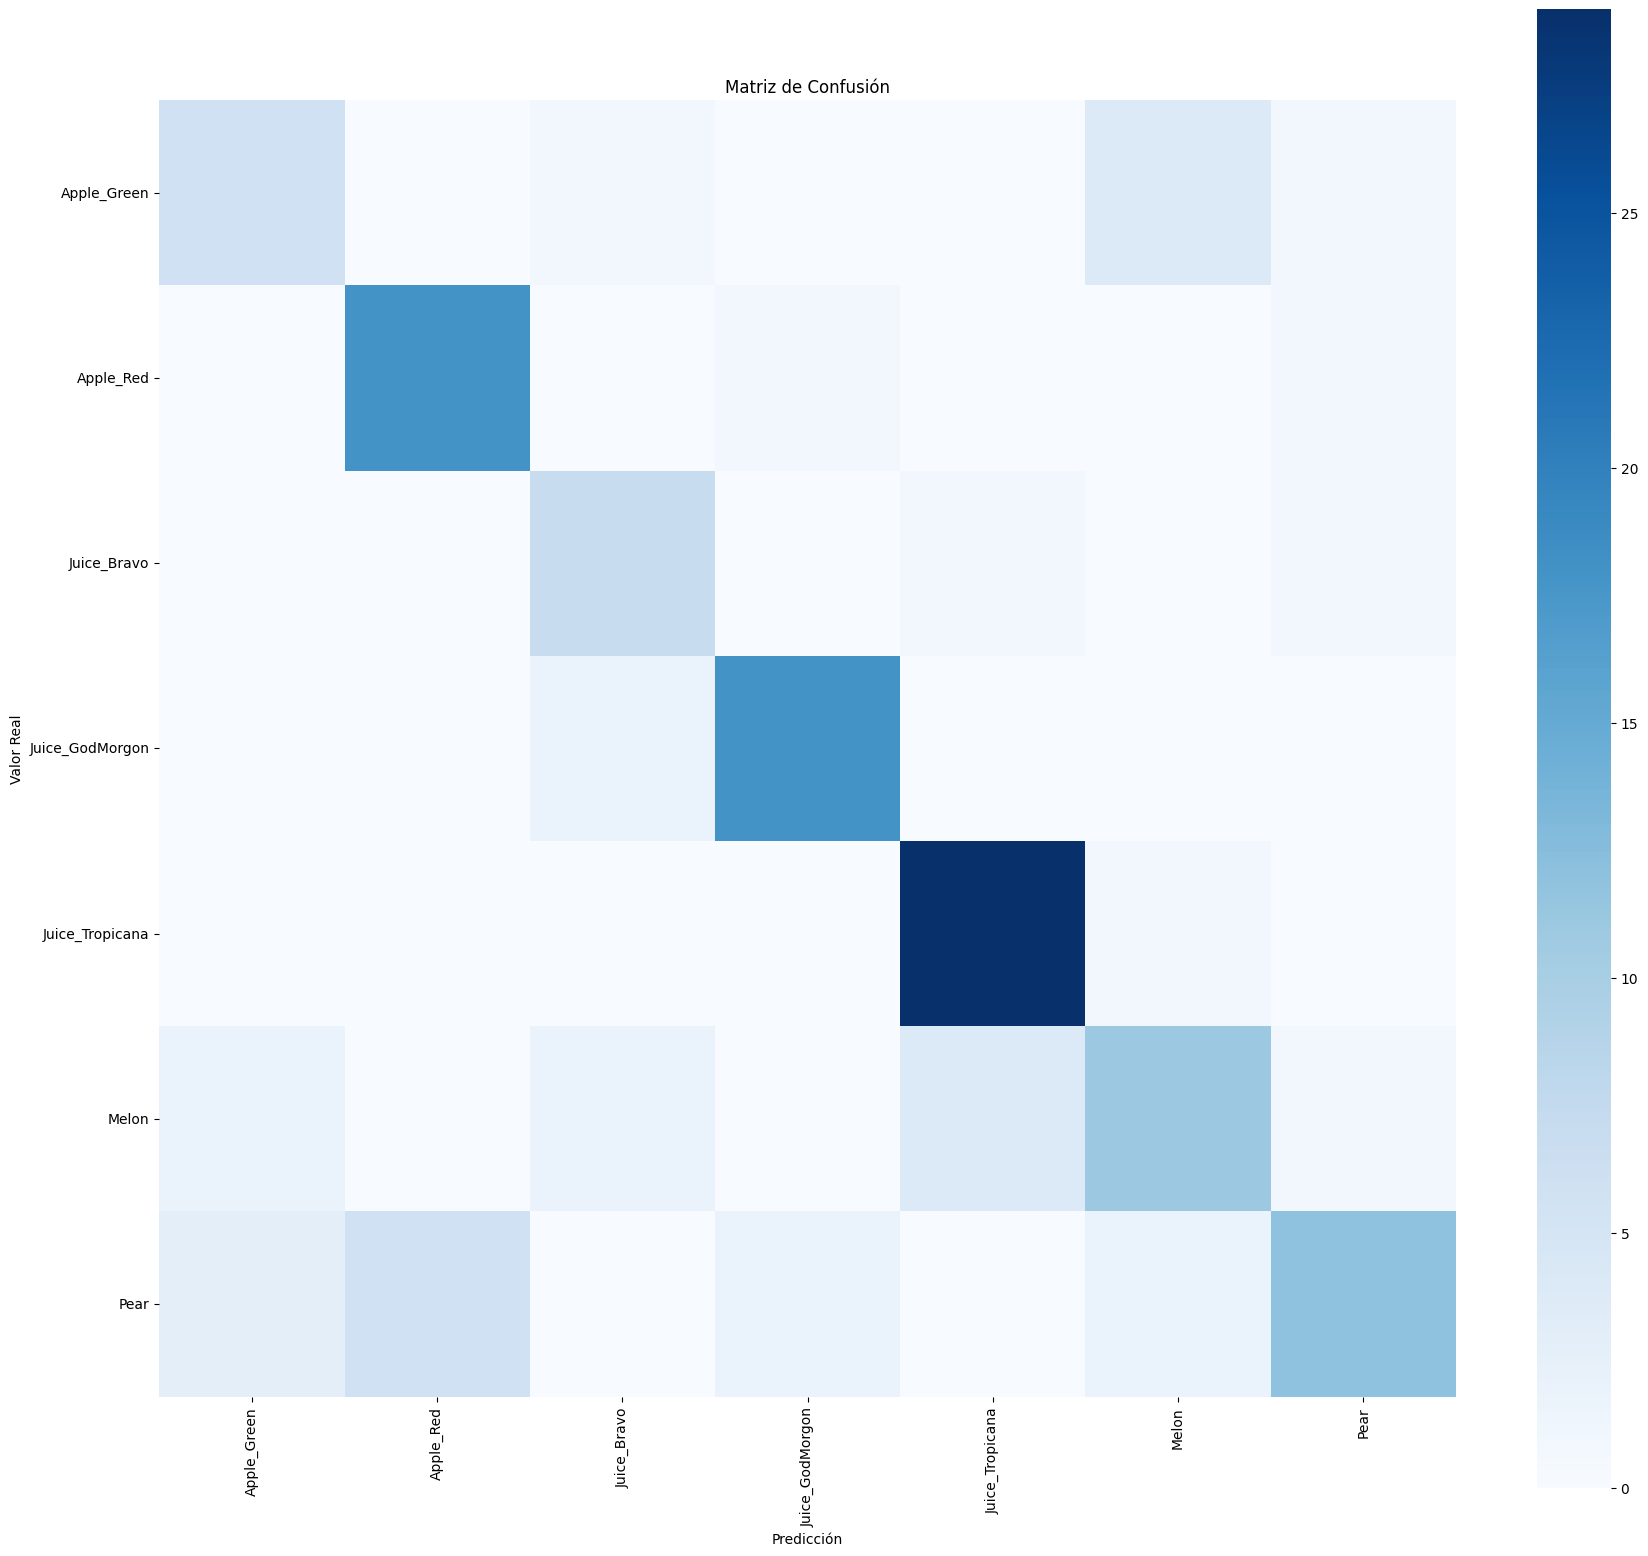

In [519]:
# 📉 Matriz de Confusión multiclase
ev.plot_confusion_matrix(y_true, y_pred, class_names=class_names)

In [520]:
# 🧪 Métricas de clasificación
from sklearn.metrics import classification_report

# ✅ Mostrar métricas por clase
print("📄 Reporte de clasificación por clase:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

📄 Reporte de clasificación por clase:
                 precision    recall  f1-score   support

    Apple_Green       0.55      0.50      0.52        12
      Apple_Red       0.75      0.90      0.82        20
    Juice_Bravo       0.58      0.78      0.67         9
Juice_GodMorgon       0.86      0.90      0.88        20
Juice_Tropicana       0.85      0.97      0.91        30
          Melon       0.61      0.55      0.58        20
           Pear       0.75      0.48      0.59        25

       accuracy                           0.74       136
      macro avg       0.71      0.72      0.71       136
   weighted avg       0.74      0.74      0.73       136



In [521]:
# 📈 Distribución de probabilidades para cada clase
#for i, class_name in enumerate(class_names):
    #ev.plot_prediction_distribution(y_true, y_scores[:, i], class_index=i, class_name=class_name)

In [522]:
# ✅ Reflexión final
print("✅ Evaluación completa. Analiza si hay overfitting, errores sistemáticos o clases mal representadas.")

✅ Evaluación completa. Analiza si hay overfitting, errores sistemáticos o clases mal representadas.
